In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from sklearn.datasets import load_iris

In [8]:
iris=load_iris()

In [9]:
datos=pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [10]:
from sklearn.decomposition import PCA

In [11]:
PCA?

Init signature:
PCA(
    n_components=None,
    *,
    copy=True,
    whiten=False,
    svd_solver='auto',
    tol=0.0,
    iterated_power='auto',
    random_state=None,
)
Docstring:     
Principal component analysis (PCA).

Linear dimensionality reduction using Singular Value Decomposition of the
data to project it to a lower dimensional space. The input data is centered
but not scaled for each feature before applying the SVD.

It uses the LAPACK implementation of the full SVD or a randomized truncated
SVD by the method of Halko et al. 2009, depending on the shape of the input
data and the number of components to extract.

It can also use the scipy.sparse.linalg ARPACK implementation of the
truncated SVD.

Notice that this class does not support sparse input. See
:class:`TruncatedSVD` for an alternative with sparse data.

Read more in the :ref:`User Guide <PCA>`.

Parameters
----------
n_components : int, float or 'mle', default=None
    Number of components to keep.
    if n_componen

In [12]:
componentes=PCA(n_components =3)

In [13]:
componentes

PCA(n_components=3)

In [14]:
componentes.fit(datos)

PCA(n_components=3)

In [15]:
df=componentes.transform(datos)

In [16]:
## componentes.fit_transform(datos)

In [17]:
df[:10]

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272]])

In [18]:
len(df)

150

In [19]:
componentes.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143]])

In [20]:
componentes.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 ])

In [21]:
componentes.explained_variance_ratio_.cumsum()

array([0.92461872, 0.97768521, 0.99478782])

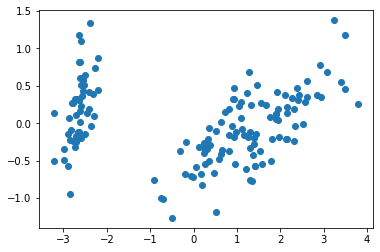

In [22]:
plt.scatter(df[:,0],df[:,1])

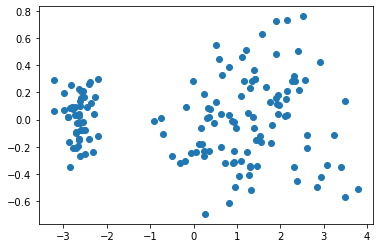

In [23]:
plt.scatter(df[:,0],df[:,2])

In [24]:
df=df[:,:2]

In [25]:
df=pd.DataFrame(df,columns=["PC1","PC2"])

In [26]:
df["Target"]=iris.target

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, f1_score

In [28]:
X_train, X_test, y_train,y_test = train_test_split(df[["PC1","PC2"]],df["Target"],
                                                   test_size=0.2,
                                                   shuffle=True,
                                                   random_state=1234)

In [29]:
Modelo=KNeighborsClassifier()

In [30]:
Modelo.fit(X_train,y_train)

KNeighborsClassifier()

In [31]:
y_pred=Modelo.predict(X_test)

In [32]:
y_pred

array([1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 0, 2, 1, 2, 0])

In [33]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2
Target,,,
0,9,0,0
1,0,13,0
2,0,0,8


In [34]:
mean_absolute_percentage_error(y_test,y_pred)

0.0

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Sin utilizar PCA

In [37]:
Modelo2=KNeighborsClassifier()

In [38]:
X_train, X_test, y_train,y_test = train_test_split(datos,iris.target,
                                                   test_size=0.2,
                                                   shuffle=True,
                                                   random_state=1234)

In [39]:
Modelo2.fit(X_train,y_train)


KNeighborsClassifier()

In [40]:
y_pred=Modelo2.predict(X_test)

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [42]:
datos.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


##  Ejercicio Cancer

In [43]:
from sklearn.datasets import load_breast_cancer

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
from sklearn.preprocessing import power_transform

In [46]:
power_transform?

Signature: power_transform(X, method='yeo-johnson', *, standardize=True, copy=True)
Docstring:
Power transforms are a family of parametric, monotonic transformations
that are applied to make data more Gaussian-like. This is useful for
modeling issues related to heteroscedasticity (non-constant variance),
or other situations where normality is desired.

Currently, power_transform supports the Box-Cox transform and the
Yeo-Johnson transform. The optimal parameter for stabilizing variance and
minimizing skewness is estimated through maximum likelihood.

Box-Cox requires input data to be strictly positive, while Yeo-Johnson
supports both positive or negative data.

By default, zero-mean, unit-variance normalization is applied to the
transformed data.

Read more in the :ref:`User Guide <preprocessing_transformer>`.


Parameters
----------
X : array-like of shape (n_samples, n_features)
    The data to be transformed using a power transformation.

method : {'yeo-johnson', 'box-cox'}, default

In [47]:
from sklearn.preprocessing import maxabs_scale

$$X=\cfrac{y_i}{max(|y_j|)}$$

In [48]:
maxabs_scale?

Signature: maxabs_scale(X, *, axis=0, copy=True)
Docstring:
Scale each feature to the [-1, 1] range without breaking the sparsity.

This estimator scales each feature individually such
that the maximal absolute value of each feature in the
training set will be 1.0.

This scaler can also be applied to sparse CSR or CSC matrices.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    The data.

axis : int, default=0
    axis used to scale along. If 0, independently scale each feature,
    otherwise (if 1) scale each sample.

copy : bool, default=True
    Set to False to perform inplace scaling and avoid a copy (if the input
    is already a numpy array).

Returns
-------
X_tr : {ndarray, sparse matrix} of shape (n_samples, n_features)
    The transformed data.

.. warning:: Risk of data leak

    Do not use :func:`~sklearn.preprocessing.maxabs_scale` unless you know
    what you are doing. A common mistake is to apply it to the entire data
    *before

In [49]:
from sklearn.model_selection import cross_validate

In [50]:
cross_validate?

Signature:
cross_validate(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    return_train_score=False,
    return_estimator=False,
    error_score=nan,
)
Docstring:
Evaluate metric(s) by cross-validation and also record fit/score times.

Read more in the :ref:`User Guide <multimetric_cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : array-like of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with 

In [53]:
Modelo_3=KNeighborsClassifier()
aux=cross_validate(Modelo_3,X_train,y_train,scoring="accuracy",
               n_jobs=-1,cv=5,return_train_score=True)

In [55]:
aux['test_score'].mean()

0.9583333333333333

In [56]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

In [57]:
KNeighborsClassifier?

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'} or callable, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape
     

In [72]:
parametros={'weights':['uniform', 'distance'],
            "n_neighbors":np.linspace(3,13,4).astype(int)}

In [73]:
parametros

{'weights': ['uniform', 'distance'], 'n_neighbors': array([ 3,  6,  9, 13])}

In [74]:
malla=GridSearchCV(estimator=KNeighborsClassifier(),
                   param_grid=parametros,
                   scoring="accuracy",
                   cv=10,
                   n_jobs=-1)

In [75]:
malla.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 3,  6,  9, 13]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [76]:
malla.best_score_

0.9666666666666666

In [77]:
malla.best_estimator_

KNeighborsClassifier(n_neighbors=9)

In [80]:
pd.DataFrame(malla.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
4,0.005603,0.003527,0.006395,0.002278,9,uniform,"{'n_neighbors': 9, 'weights': 'uniform'}",1.000000,1.0,1.0,1.0,0.833333,0.916667,1.000000,0.916667,1.0,1.0,0.966667,0.055277,1
5,0.012201,0.014261,0.014181,0.014455,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",1.000000,1.0,1.0,1.0,0.833333,0.916667,1.000000,0.916667,1.0,1.0,0.966667,0.055277,1
6,0.008243,0.005877,0.016250,0.012064,13,uniform,"{'n_neighbors': 13, 'weights': 'uniform'}",0.916667,1.0,1.0,1.0,0.833333,1.000000,1.000000,0.916667,1.0,1.0,0.966667,0.055277,1
7,0.010488,0.007392,0.008588,0.009101,13,distance,"{'n_neighbors': 13, 'weights': 'distance'}",1.000000,1.0,1.0,1.0,0.833333,0.916667,1.000000,0.916667,1.0,1.0,0.966667,0.055277,1
3,0.011683,0.023756,0.007594,0.006027,6,distance,"{'n_neighbors': 6, 'weights': 'distance'}",1.000000,1.0,1.0,1.0,0.833333,0.916667,0.916667,0.916667,1.0,1.0,0.958333,0.055902,5
0,0.008965,0.004127,0.013539,0.009865,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.916667,1.0,1.0,1.0,0.833333,0.916667,0.916667,0.916667,1.0,1.0,0.950000,0.055277,6
1,0.008881,0.010286,0.011865,0.014107,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.916667,1.0,1.0,1.0,0.833333,0.916667,0.916667,0.916667,1.0,1.0,0.950000,0.055277,6
2,0.006385,0.005715,0.008277,0.005607,6,uniform,"{'n_neighbors': 6, 'weights': 'uniform'}",1.000000,1.0,1.0,1.0,0.833333,0.833333,0.916667,0.916667,1.0,1.0,0.950000,0.066667,6


In [81]:
y_pred=malla.best_estimator_.predict(X_test)

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

